In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("cost_revenue_dirty.csv")
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [8]:
# Checking any NaN
df.isnull().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [9]:
# Checking any NaN
df.isna().values.any()

False

In [10]:
# Checking an Duplicates
print(df.duplicated().values.any())
duplicated_rows = df[df.duplicated()]
len(duplicated_rows)

False


0

In [11]:
chars_to_remove = [",", "$"]
columns_to_clean = ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]
for column in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        df[column] = df[column].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    df[column] = pd.to_numeric(df[column])
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_15200\2740715745.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column] = df[column].astype(str).str.replace(char, "")


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [12]:
y = df["USD_Production_Budget"]
x = df["USD_Worldwide_Gross"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [15]:
x_train

536      92961960
2592    109843390
4554     87956618
2574     26184400
2770     42064105
          ...    
4931      1165996
3264     57193655
1653      8761608
2607      2797199
2732     21970831
Name: USD_Worldwide_Gross, Length: 3773, dtype: int64

In [16]:
x_test = np.array(x_test).reshape(-1, 1)
x_test

array([[ 26323969],
       [  8891623],
       [ 69057415],
       ...,
       [        0],
       [ 37750754],
       [181053657]], dtype=int64)

In [17]:
x_train = np.array(x_train).reshape(-1, 1)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [19]:
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
c = lr.intercept_
c

14807083.183933698

In [21]:
m = lr.coef_
m

array([0.19012254])

In [22]:
y_pred_train = m * x_train + c
y_pred_train

array([[32481246.77500816],
       [35690787.05870348],
       [31529618.46018697],
       ...,
       [16472862.316741  ],
       [15338893.75164107],
       [18984233.29270776]])

In [23]:
y_pred_train1 = lr.predict(x_train)
y_pred_train1

array([32481246.77500816, 35690787.05870348, 31529618.46018697, ...,
       16472862.316741  , 15338893.75164107, 18984233.29270776])

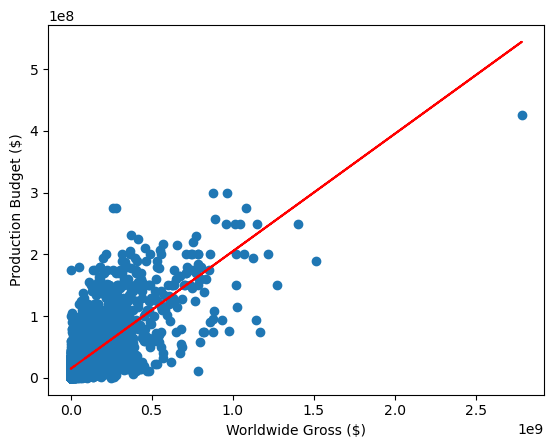

In [24]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_train, color = "red")
plt.ylabel("Production Budget ($)")
plt.xlabel("Worldwide Gross ($)")
plt.show()

In [26]:
y_pred_test = lr.predict(x_test)
y_pred_test

array([19811862.92902914, 16497581.09826511, 27936454.05656504, ...,
       14807083.1839337 , 21984352.27208985, 49229463.61330809])

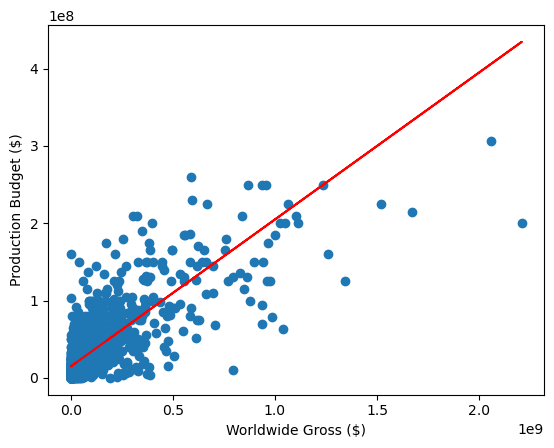

In [27]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, color = "red")
plt.ylabel("Production Budget ($)")
plt.xlabel("Worldwide Gross ($)")
plt.show()

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

## One-Way Analysis of Variance (ANOVA)

In [39]:
print("Analysis of Variance (ANOVA)")
print("-" * 30)
model = ols("USD_Production_Budget ~ USD_Worldwide_Gross", data = df).fit()
ANOVA = sm.stats.anova_lm(model, type=2)
ANOVA

Analysis of Variance (ANOVA)
------------------------------


,df,sum_sq,mean_sq,F,PR(>F)
USD_Worldwide_Gross,1.0,4.889019e+18,4.889019e+18,6649.366732,0.0
Residual,5389.0,3.962321e+18,7.352609e+14,NaN,NaN


In [40]:
from sklearn.metrics import r2_score 

In [41]:
r2_score(x_train, y_train)

0.19231222411003457